In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image Resizing

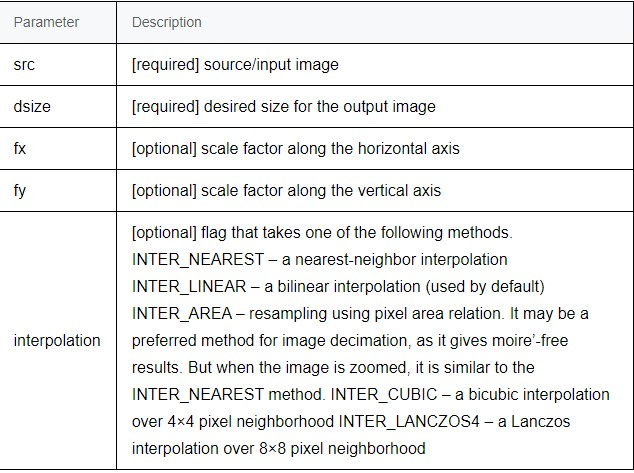

In [3]:
img = cv2.imread("Images/tomato.jpg")

half = cv2.resize(src=img, dsize=(0,0), fx=0.1, fy=0.2)

cv2.imshow("Image", half)
cv2.waitKey(0)
cv2.destroyAllWindows()

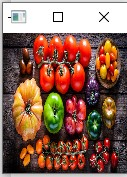

In [4]:
bigger  = cv2.resize(src=img, dsize=(800,800))

cv2.imshow("Image", bigger )
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
stretch_near = cv2.resize(src=img, dsize=(500,450), interpolation= cv2.INTER_NEAREST)

cv2.imshow("Image", stretch_near)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Erode

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. cv2.erode() method is used to perform erosion on the image. The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

### Bordering

In [6]:
img = cv2.imread("Images/girl-mask.jpg")

img = cv2.copyMakeBorder(src=img, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=0)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

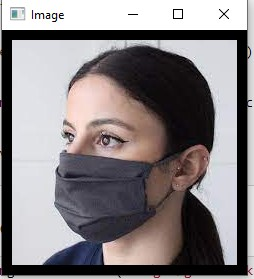

In [7]:
img = cv2.imread("Images/girl-mask.jpg")

img = cv2.copyMakeBorder(src=img, top=10, bottom=10, left=10, right=10,
                         borderType=cv2.BORDER_REFLECT, value=0)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

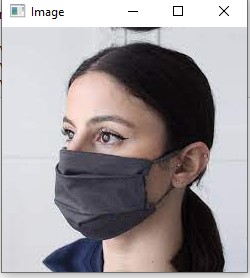

## Image Pyramid using OpenCV

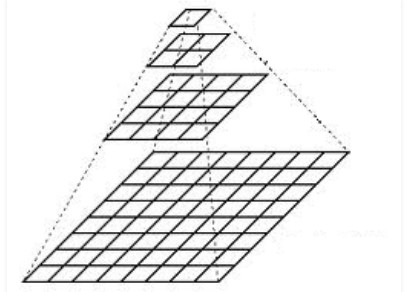

In [2]:
import matplotlib.pyplot as plt

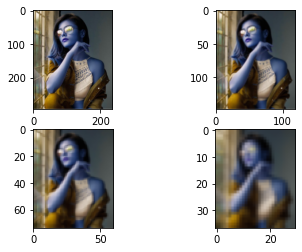

In [10]:
image = cv2.imread(filename="Images/girl.png")

layer = image.copy()

for i in range(4):
    plt.subplot(2, 2, i+1)
    
    # using pyrDown() function
    layer = cv2.pyrDown(src=layer)
    plt.imshow(layer)
    cv2.imshow(winname=f"{str(i)}", mat=layer)
    cv2.waitKey()

cv2.destroyAllWindows()

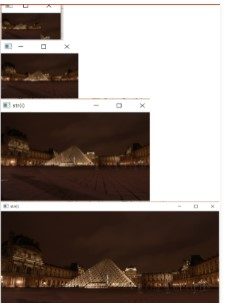

## Image blurring using OpenCV

### Please Read the pdf

In [21]:
original_img = cv2.imread(filename="Images/girl.png")

# Gaussian Blur
gaussaian = cv2.GaussianBlur(src=original_img, ksize=(7,7), sigmaX=0)

# Median Blur
median = cv2.medianBlur(src=image, ksize=5)
  
# Bilateral Blur

bilateral = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

horizontal_stake = np.hstack((gaussaian, median, bilateral))

horizontal_stake = cv2.resize(src=horizontal_stake, dsize=(800,300))

cv2.imshow(winname="All Images", mat=horizontal_stake)
cv2.waitKey()

cv2.destroyAllWindows()

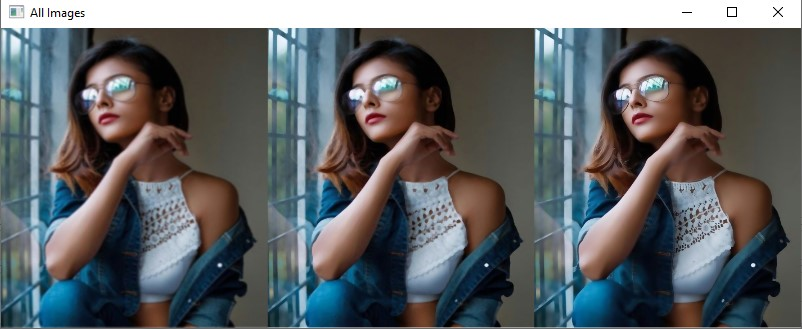

## Image Translation using OpenCV

In [8]:
image = cv2.imread("Images/girl.png")

image = cv2.resize(src=image, dsize=(500,500))

height, width = image.shape[0:2]

quarter_height, quarter_width = height / 4, width / 4

T = np.float32([ [1, 0, quarter_width], [0, 1, quarter_height] ])

# We use warpAffine to transform the image using matrix, T

img_translation = cv2.warpAffine(src=image, M=T, dsize=(width, height))

result = np.hstack((image, img_translation))

cv2.imshow(winname="Original and translate image", mat=result)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
print(image.shape[:2])

(590, 474)


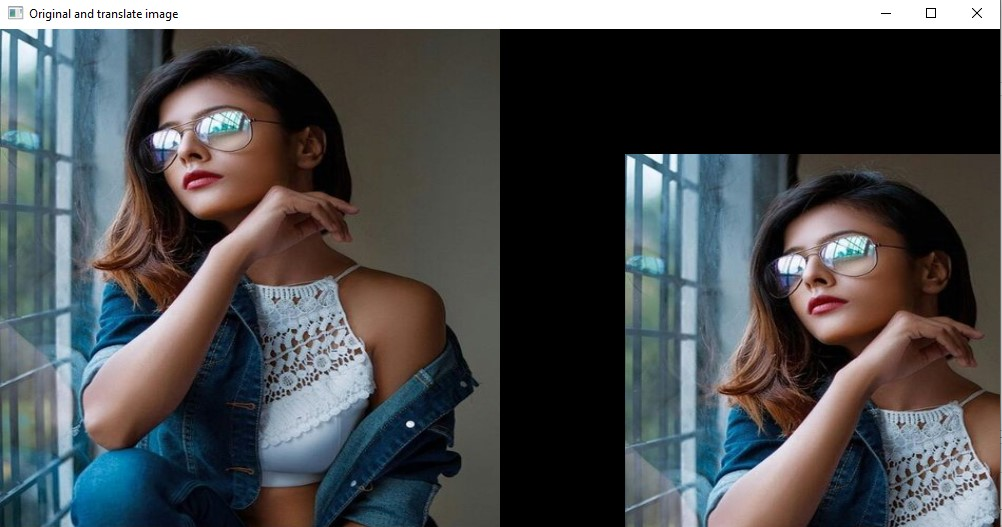

## Filter Color with OpenCV

Colour segmentation or color filtering is widely used in OpenCV for identifying specific objects/regions having a specific color. The most widely used color space is RGB color space, it is called an additive color space as the three color shades add up to give color to the image. To identify a region of a specific color, put the threshold and create a mask to separate the different colors. HSV color space is much more useful for this purpose as the colors in HSV space are much more localized thus can be easily separated. Color Filtering has many applications and uses cases such as in Cryptography, infrared analysis, food preservation of perishable foods, etc. In such cases, the concepts of Image processing can be used to find out or extract out regions of a particular color. 
For color segmentation, all we need is the threshold values or the knowledge of the lower bound and upper bound range of colors in one of the color spaces. It works best in the Hue-Saturation-Value color space. 
After specifying the range of color to be segmented, it is needed to create a mask accordingly and by using it, a particular region of interest can be separated out.

In [3]:
cap_video = cv2.VideoCapture(0)

cap_video.set(propId=3, value=350)
cap_video.set(propId=4, value=350)

while True:
    success, frame = cap_video.read()
    if success == True:
        # It converts the BGR color space of image to HSV color space
        hsv = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2HSV)
        
        # Threshould of blue in HSV space
        lower_blue = np.array([60, 35, 140])
        upper_blue = np.array([180, 255, 255])
        
        # Preparing the mask to overlay
        mask = cv2.inRange(src=hsv, lowerb=lower_blue, upperb=upper_blue)
        
        # The black region in the mask has the value of 0,
        # so when multiplied with original image removes all non-blue regions
        
        # Syntax: bitwise_and(src1, src2[, dst[, mask]]) -> dst
        result = cv2.bitwise_and(src1=frame, src2=frame, mask=mask)
        
        cv2.imshow(winname='frame', mat= frame)
        cv2.imshow(winname='mask',  mat=mask)
        cv2.imshow(winname='result', mat=result)
     
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break


cv2.destroyAllWindows()
cap_video.release()

## OpenCV Python Program to analyze an image using Histogram

In [6]:
plt.imread(fname="Images/image-using-Histogram.png")

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

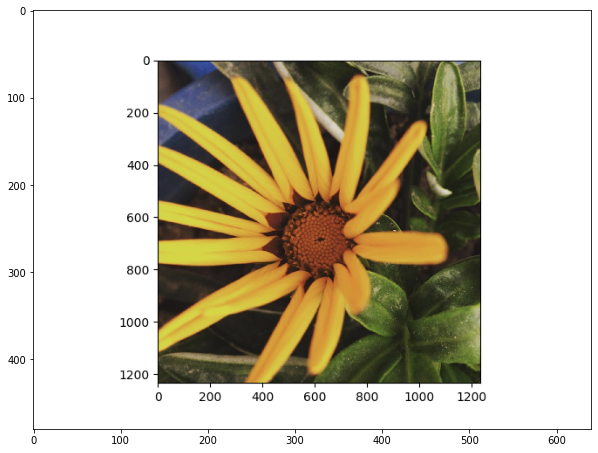

In [8]:
plt.figure(figsize=(10,10))
img = plt.imread(fname="Images/image-using-Histogram.png")
plt.imshow(img)
plt.show()

All about Histogram

Histogram is considered as a graph or plot which is related to frequency of pixels in an Gray Scale Image
with pixel values (ranging from 0 to 255). Grayscale image is an image in which the value of each pixel is a single sample, that is, it carries only intensity information where pixel value varies from 0 to 255. Images of this sort, also known as black-and-white, are composed exclusively of shades of gray, varying from black at the weakest intensity to white at the strongest where Pixel can be considered as a every point in an image.

### Histogram creation using numpy array

(array([5158.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,   75.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   31.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   91.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   23.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,   40.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   53.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  128.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   62.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          74.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   71.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  116.,    0.,    0.,    0.,    0.,    0.,
      

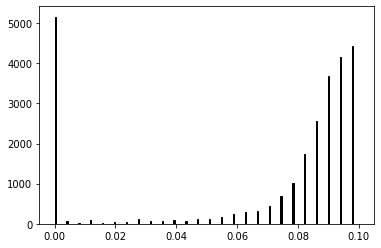

In [9]:
# Calculating histogram

plt.hist(x=img.ravel(), bins=256, range=(0.0, 0.1), fc='k', ec='k')

### Histogram Calculation

images : it is the source image of type uint8 or float32 represented as “[img]”.

channels : it is the index of channel for which we calculate histogram. For grayscale image, its value is [0] and
color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as “None”.

histSize : this represents our BIN count. For full scale, we pass [256].

ranges : this is our RANGE. Normally, it is [0,256].

Docstring:
calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
.   @overload

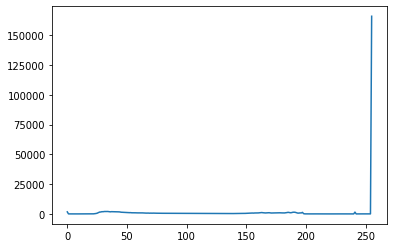

In [11]:
gray_img = cv2.imread(filename="Images/image-using-Histogram.png", flags=0)

# calculate frequency of pixels in range 0-255
hist_img = cv2.calcHist(images=[gray_img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

# Plotting Histograms
plt.plot(hist_img)
plt.show()

## Background Subtraction in an Image using Concept of Running Average

In [2]:
# Capture frames from a camera
cap = cv2.VideoCapture(0)

# Read the frames from the camera
success, img = cap.read()

# Modify the data type setting to 32-bit floating point
averageValue1 = np.float32(img)

while(1):
    # Reads frames from a camera
    success, img = cap.read()
    if success == True:
        # using the cv2.accumulateWeighted() function that updates the running average
        cv2.accumulateWeighted(src=img, dst=averageValue1, alpha=0.02)
        # Converting the matrix elements to absolute values and converting the result to 8-bit
        resultingFrames1 = cv2.convertScaleAbs(src=averageValue1)
        # Show two output windows the input / original frames window
        cv2.imshow(winname="InputWindow", mat=img)
        # The window showing output of alpha value 0.02
        cv2.imshow(winname="averageValue1", mat=resultingFrames1)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

## Background subtraction using OpenCV

Background Subtraction has several use cases in everyday life, It is being used for object segmentation, security enhancement, pedestrian tracking, counting the number of visitors, number of vehicles in traffic etc. It is able to learn and identify the foreground mask.
As the name suggests, it is able to subtract or eliminate the background portion in an image. Its output is a binary segmented image which essentially gives information about the non-stationary objects in the image. There lies a problem in this concept of finding non-stationary portion, as the shadow of the moving object can be moving and sometimes being classified in the foreground.
The popular Background subtraction algorithms are: 
 

BackgroundSubtractorMOG : It is a gaussian mixture based background segmentation algorithm.

BackgroundSubtractorMOG2: It uses the same concept but the major advantage that it provides is in terms of stability even when there is change in luminosity and better identification capability of shadows in the frames.

Geometric multigrid: It makes uses of statistical method and per pixel bayesin segmentation algorithm.

In [3]:
cap = cv2.VideoCapture(0)

backgroundSub = cv2.createBackgroundSubtractorMOG2()

while(True):
    success, img = cap.read()
    if success == True:
        fgmask = backgroundSub.apply(img)
        
        cv2.imshow(winname="fgmask", mat=fgmask)
        cv2.imshow(winname="Image", mat=img)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

## Histograms Equalization

Histogram equalization is a method in image processing of contrast adjustment using the image’s histogram.

This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values. The method is useful in images with backgrounds and foregrounds that are both bright or both dark.

OpenCV has a function to do this, cv2.equalizeHist(). Its input is just grayscale image and output is our histogram equalized image.

In [4]:
girl_img = cv2.imread('Images/girl.png', 0) # 0 means we take the gray scale image

resize_img = cv2.resize(src=girl_img, dsize=(400, 400))

# creating a Histograms Equalization of a image using cv2.equalizeHist()

# equalizeHist(src[, dst]) -> dst

histeq = cv2.equalizeHist(src=resize_img)

# stacking images side-by-side
result = np.hstack((resize_img, histeq))

cv2.imshow(winname="Images", mat=result)
cv2.waitKey()
cv2.destroyAllWindows()

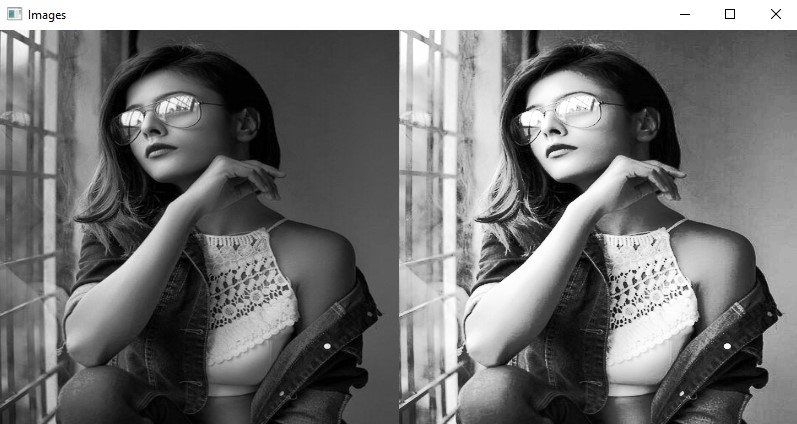